# Abalone Project

## Data Soource:UCI 

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years

### Abstract: Predict the age of abalone from physical measurements



## Importing libraries

In [74]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
import pandas as pd
# from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

## Importing data

In [3]:
col_names = ['sex','length','diameter','height','whole weight','shocked weight','viscera weight','shell weight','rings']
dataset = pd.read_csv('abalone.csv',names = col_names)

In [4]:
dataset.head()

,sex,length,diameter,height,whole weight,shocked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
dataset.shape

(4177, 9)

In [6]:
dataset.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole weight      float64
shocked weight    float64
viscera weight    float64
shell weight      float64
rings               int64
dtype: object

In [7]:
pd.set_option('precision',1)
dataset.describe()

,length,diameter,height,whole weight,shocked weight,viscera weight,shell weight,rings
count,4.2e+03,4.2e+03,4.2e+03,4.2e+03,4.2e+03,4.2e+03,4.2e+03,4177.0
mean,5.2e-01,4.1e-01,1.4e-01,8.3e-01,3.6e-01,1.8e-01,2.4e-01,9.9
std,1.2e-01,9.9e-02,4.2e-02,4.9e-01,2.2e-01,1.1e-01,1.4e-01,3.2
min,7.5e-02,5.5e-02,0.0e+00,2.0e-03,1.0e-03,5.0e-04,1.5e-03,1.0
25%,4.5e-01,3.5e-01,1.2e-01,4.4e-01,1.9e-01,9.3e-02,1.3e-01,8.0
50%,5.5e-01,4.2e-01,1.4e-01,8.0e-01,3.4e-01,1.7e-01,2.3e-01,9.0
75%,6.1e-01,4.8e-01,1.7e-01,1.2e+00,5.0e-01,2.5e-01,3.3e-01,11.0
max,8.1e-01,6.5e-01,1.1e+00,2.8e+00,1.5e+00,7.6e-01,1.0e+00,29.0


## Checking Correlation

In [8]:
pd.set_option('precision',2)
dataset.corr(method = 'pearson')

,length,diameter,height,whole weight,shocked weight,viscera weight,shell weight,rings
length,1.00,0.99,0.83,0.93,0.90,0.90,0.90,0.56
diameter,0.99,1.00,0.83,0.93,0.89,0.90,0.91,0.57
height,0.83,0.83,1.00,0.82,0.77,0.80,0.82,0.56
whole weight,0.93,0.93,0.82,1.00,0.97,0.97,0.96,0.54
shocked weight,0.90,0.89,0.77,0.97,1.00,0.93,0.88,0.42
viscera weight,0.90,0.90,0.80,0.97,0.93,1.00,0.91,0.50
shell weight,0.90,0.91,0.82,0.96,0.88,0.91,1.00,0.63
rings,0.56,0.57,0.56,0.54,0.42,0.50,0.63,1.00


Length and height have less correlation than other feature considering them for the model

## Selecting height and length features and target rings column

In [11]:
x = dataset[['height','length']]
y = dataset[['rings']]

In [12]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y,
test_size=validation_size, random_state=seed)

In [13]:
num_folds = 10
seed = 7
scoring  = 'neg_mean_squared_error'

## Storting different models for the prediction

In [24]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [15]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -7.091064 (1.861208)
LASSO: -10.185296 (1.163978)
KNN: -7.414209 (0.971155)
CART: -9.207094 (1.249561)
SVR: -6.838209 (1.116691)


## Plotting models score

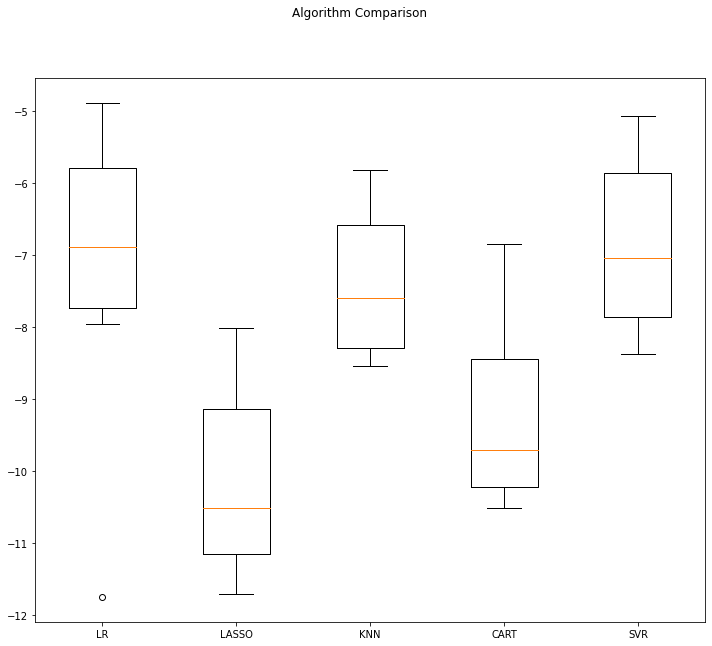

In [16]:
fig = plt.figure(figsize = (12,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Scaling

In [17]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -7.091064 (1.861208)
ScaledLASSO: -8.008706 (1.306336)
ScaledKNN: -7.379938 (1.005327)
ScaledCART: -9.242327 (1.261880)
ScaledSVR: -6.645062 (1.050509)


## Plotting model with scaled model

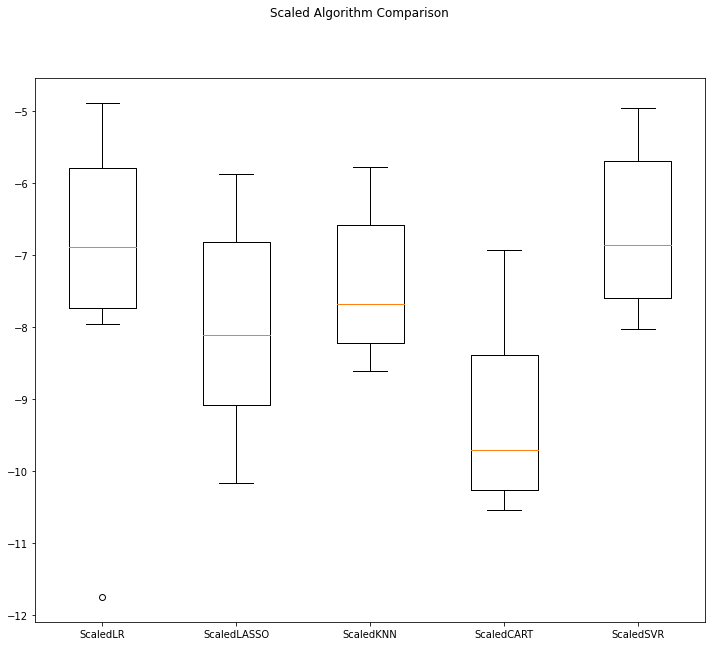

In [18]:
fig = plt.figure(figsize = (12,10))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Selecting SVR model as final model

In [40]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'gamma':['auto'],"C": [100,150,200,250,300,350,450,500,550,600]}
model = SVR()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [58]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -6.625492 using {'C': 100, 'gamma': 'auto'}
-6.625492 (1.058530) with: {'C': 100, 'gamma': 'auto'}
-6.631969 (1.058081) with: {'C': 150, 'gamma': 'auto'}
-6.640811 (1.060830) with: {'C': 200, 'gamma': 'auto'}
-6.650675 (1.058780) with: {'C': 250, 'gamma': 'auto'}
-6.660769 (1.055364) with: {'C': 300, 'gamma': 'auto'}
-6.667600 (1.054712) with: {'C': 350, 'gamma': 'auto'}
-6.676683 (1.052765) with: {'C': 450, 'gamma': 'auto'}
-6.679846 (1.053133) with: {'C': 500, 'gamma': 'auto'}
-6.682328 (1.051942) with: {'C': 550, 'gamma': 'auto'}
-6.685597 (1.050232) with: {'C': 600, 'gamma': 'auto'}


In [72]:
rescaledValidationX = scaler.transform(X_validation)
ypred = model.predict(rescaledValidationX)

In [73]:
mean_squared_error(Y_validation,ypred)

7.370002786209988